# window 11

# GPU 4060 labtop
# CPU i9-13900HX
# RAM 32GB

# Cuda 11.2
# Tensorflow 2.8

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class train_mnist():
    def __init__(self):
        
        
        pass
        
        
    def get_model(self,model_type):
        assert model_type in ['FC','CNN'], 'not found model name'
        # Build the model

        if model_type=='FC':
            self.model = Sequential([
                Flatten(input_shape=(28, 28)),  # Flatten the input image
                Dense(128, activation='relu'),  # Dense layer with 128 neurons and ReLU activation
                Dense(10, activation='softmax') # Output layer with 10 neurons (one for each class) using softmax
            ])
        elif  model_type=='CNN':
            # Build the CNN model
            self.model = models.Sequential([
                        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                        layers.MaxPooling2D((2, 2)),
                        layers.Conv2D(64, (3, 3), activation='relu'),
                        layers.MaxPooling2D((2, 2)),
                        layers.Conv2D(64, (3, 3), activation='relu'),
                        layers.Flatten(),
                        layers.Dense(64, activation='relu'),
                        layers.Dense(10, activation='softmax')
                    ])
        else:
            raise ValueError("Model name must be 'FC' or 'CNN'")
        
        print(self.model.summary())

        #return model
    
    def get_data(self,select_dataset_size =0.5):
        # Load MNIST dataset
        (self.train_images, self.train_labels), (self.test_images, self.test_labels) = mnist.load_data()
        # Normalize the images
        self.train_images = self.train_images / 255.0
        self.test_images = self.test_images / 255.0
        
        #
        
        # Determine the number of training and testing samples to use
        num_train = int(len(self.train_images) * select_dataset_size)
        num_test = int(len(self.test_images) * select_dataset_size)

        # Select the first 50% of the dataset
        self.train_images = self.train_images[:num_train]
        self.train_labels = self.train_labels[:num_train]
        self.test_images = self.test_images[:num_test]
        self.test_labels = self.test_labels[:num_test]
        print('Data loaded')
        
    def compile_model(self):
        if self.model is None:
            raise AttributeError("Model has not been initialized or is None.")
        # Compile the model
        self.model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        
        
        print('Model compiled')
        
    def fit_model(self):
        # Train the model and save the training history
        self.history =self.model.fit(self.train_images, self.train_labels, 
                            epochs=5, 
                            validation_split=0.1)
        
        
    def plot_images(self, num_rows, num_cols):
        """Plot a grid of images and their labels."""
        # Set up the matplotlib figure
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(1.5*num_cols, 2*num_rows))
        fig.subplots_adjust(hspace=0.5, wspace=0.5)
        plt_images = self.images
        
        for i, ax in enumerate(axes.flat):
            # Plot image.
            ax.imshow(plt_images[i].reshape(28, 28), cmap='binary')
            # Show true and predicted classes.
            ax.set_xlabel(f"Label: {self.labels[i]}")
            # Remove ticks.
            ax.set_xticks([])
            ax.set_yticks([])
            
    def evaluate(self,is_plot=True):
        test_loss, test_acc = self.model.evaluate(self.test_images, self.test_labels, verbose=2)
        print('\nTest accuracy:', test_acc)
        # Get model predictions
        predictions = self.model.predict(self.test_images)

        # Convert predictions classes from one-hot vectors to integers
        predicted_classes = np.argmax(predictions, axis=1)

        # Define number of images to view
        num_images = 10

        # Plotting
        plt.figure(figsize=(10, 10))
        for i in range(num_images):
            plt.subplot(5, 2, i+1)
            plt.imshow(self.test_images[i].reshape(28, 28), cmap='gray')
            plt.title(f"Actual: {self.test_labels[i]}, Predicted: {predicted_classes[i]}")
            plt.axis('off')
        plt.tight_layout()
        plt.show()
        
        
    
    def plot_train_acc_loss(self):
        # Plot training & validation accuracy values
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(self.history.history['accuracy'])
        plt.plot(self.history.history['val_accuracy'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        # Plot training & validation loss values
        plt.subplot(1, 2, 2)
        plt.plot(self.history.history['loss'])
        plt.plot(self.history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')

        plt.tight_layout()
        plt.show()

In [3]:
train_test = train_mnist()
train_test.get_model(model_type='CNN')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [4]:
train_test.get_data(select_dataset_size =0.5)

Data loaded


In [5]:
train_test.compile_model()


Model compiled


In [6]:
train_test.fit_model()

Epoch 1/5
844/844 [==============================] - 11s 6ms/step - loss: 0.2531 - accuracy: 0.9204 - val_loss: 0.1052 - val_accuracy: 0.9683
Epoch 2/5
844/844 [==============================] - 4s 5ms/step - loss: 0.0683 - accuracy: 0.9793 - val_loss: 0.0447 - val_accuracy: 0.9847
Epoch 3/5
844/844 [==============================] - 4s 5ms/step - loss: 0.0463 - accuracy: 0.9856 - val_loss: 0.0442 - val_accuracy: 0.9853
Epoch 4/5
844/844 [==============================] - 5s 6ms/step - loss: 0.0345 - accuracy: 0.9890 - val_loss: 0.0485 - val_accuracy: 0.9853
Epoch 5/5
844/844 [==============================] - 5s 5ms/step - loss: 0.0269 - accuracy: 0.9911 - val_loss: 0.0427 - val_accuracy: 0.9870


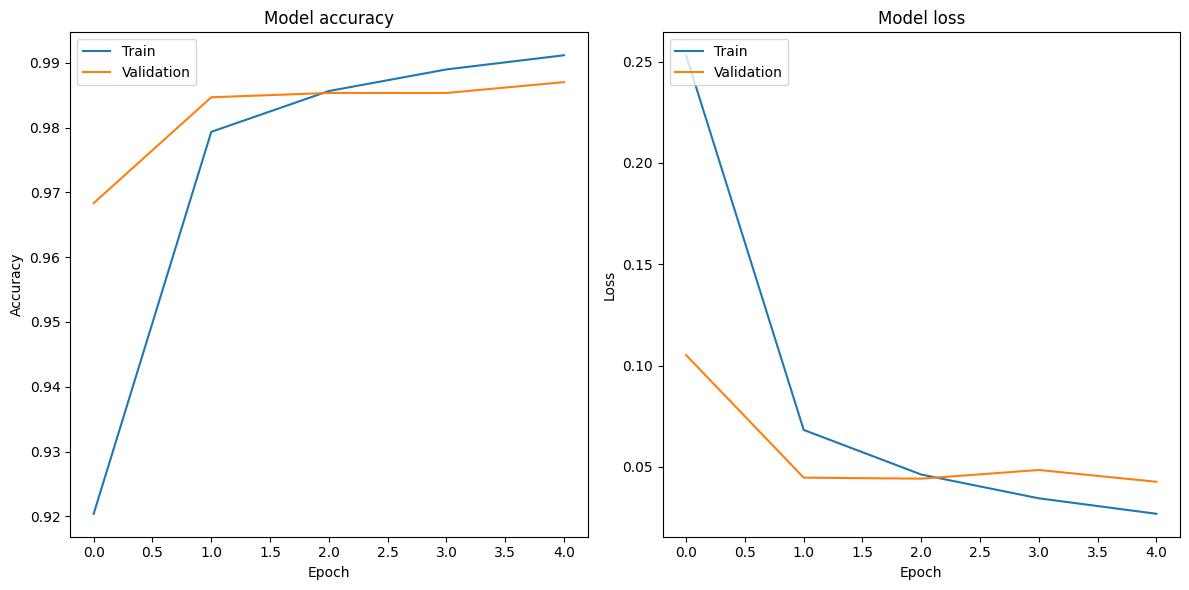

In [7]:
train_test.plot_train_acc_loss()

157/157 - 1s - loss: 0.0504 - accuracy: 0.9836 - 608ms/epoch - 4ms/step

Test accuracy: 0.9836000204086304


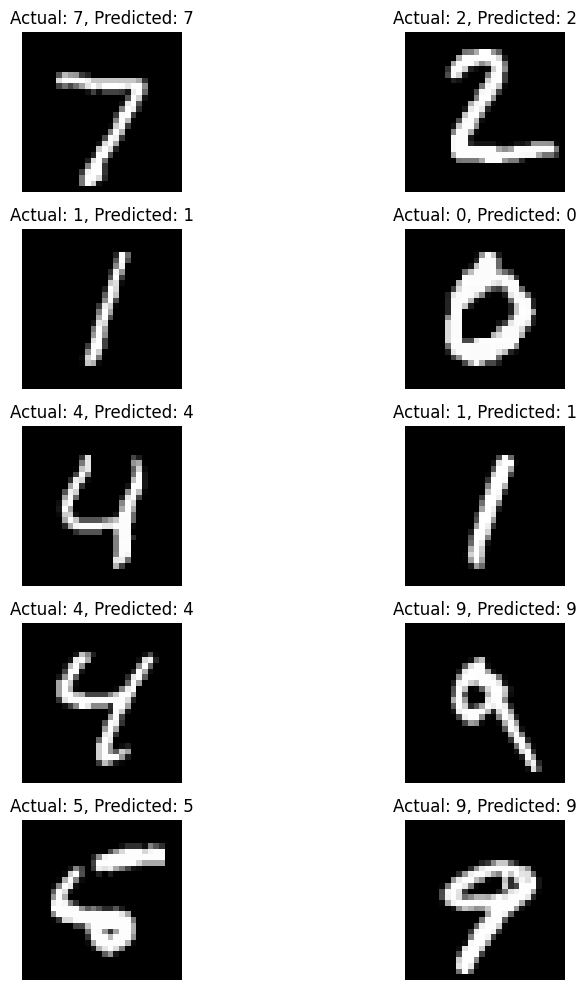

In [8]:
train_test.evaluate(is_plot=True)